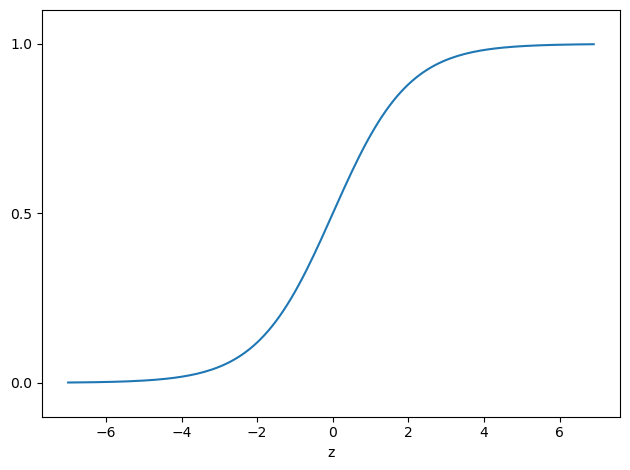

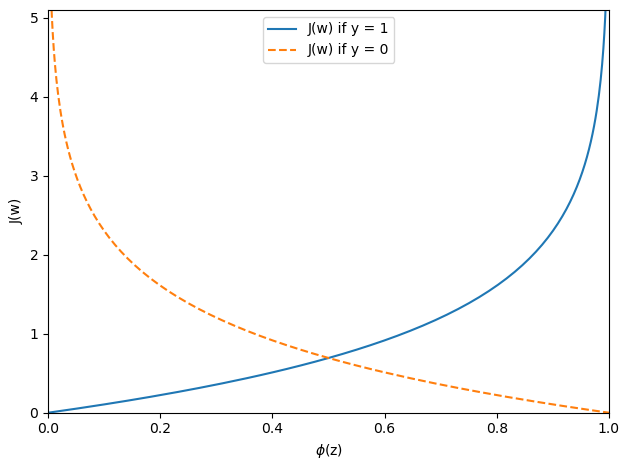

In [47]:
# logistic regression

# activation 
# ----------
# logistic regression uses possibility model to classify different types, which
# is phi(z) = 1.0 / (1.0 + np.exp(-z))

# loss function
# -------------
# logistic regression utilize Maximum Likelihood Estimation(MLE) in order to maximize possibility of 
# 'being the target type', so we need to find the maximum of our MLE function(using log(MLE) in convenience) which means minimize our
# loss function(negetive to log(MLE))

# 1. visualize sigmoid function (inverse function of logit)
import matplotlib.pyplot as plt
import numpy as np
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))
def logit(z):
    return np.log(z / (1 - z))
z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)

plt.plot(z, phi_z)
plt.xlabel('z')
plt.ylim(-0.1, 1.1)
plt.yticks([0.0, 0.5, 1.0])
plt.tight_layout()
plt.show()

# 2. visualize loss function( J(w) ) depend on sigmoid function
# fig means that with negetive odds going down the positive odds will go up
def cost_0(z):
    return - np.log(sigmoid(z))
def cost_1(z):
    return - np.log(1 - sigmoid(z))
z = np.arange(-10, 10, 0.1)
phi_z = sigmoid(z)
c1 = [cost_1(x) for x in z]
plt.plot(phi_z, c1, label='J(w) if y = 1')
c0 = [cost_0(x) for x in z]
plt.plot(phi_z, c0, linestyle='--', label='J(w) if y = 0')
plt.ylim(0.0, 5.1)
plt.xlim([0, 1])
plt.xlabel('$\phi$(z)')
plt.ylabel('J(w)')
plt.legend(loc='upper center')
plt.tight_layout()
plt.show()

In [48]:
# 3. manully create logistic Regression model
class LogisticRegressionGD(object):
    """Logistic Regression Classifier using gradient descent.
    
    Parameters
    ----------
    eta: float
        Learning rate(between 0.0 and 1.0).
    n_iter: int
        Passes over the trainning dataset.
    random_state: int
        Random number generator seed for random weight initialization.

    Attributes
    ----------
    w_: 1d-array
        Weights

    cost_: list
        Sum-of-squares cost function(SSE) value in each epoch.
    
    """
    def __init__(self, eta=0.05, n_iter=100, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data.
        
        Parameters
        ----------
        X: array-like, shape = [n_examples, n_features]
            Training data
        y: array-like, shape = [n_examples]
            Predicted value or label

        Returns
        -------
        self: object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        # Adaline learning rule: update weight through SSE
        for i in range(self.n_iter):
            output = self.activation(self.net_input(X))
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            # logistic cost/loss
            cost = (-(y.dot(np.log(output)) + (1 - y).dot(np.log(1 - output))))
            self.cost_.append(cost)
        return self
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, z):
        """Calculate logistic sigmoid activation"""
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))
    
    def predict(self, X):
        """Return classed label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, 0)
        # equivalent to:
        # return np.where(self.activation(self.net_input(X)) >= 0.5, 1.0, 0.0)

In [49]:
# 4. load and manipulate iris datasets
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np

# load iris datasets
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

# split into train and test parts
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

# scalar datasets
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# train datasets
X_train_subset_1 = X_train[(y_train == 0) | (y_train == 1)]    # we can also use standardized data to speed up convergence of errors
y_train_subset_1 = y_train[(y_train == 0) | (y_train == 1)]
lrgd = LogisticRegressionGD(eta=0.05, n_iter=1000, random_state=1)
lrgd.fit(X_train_subset_1, y_train_subset_1)

C:\Users\12923\AppData\Local\Temp\ipykernel_40508\500669962.py:38: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == col, 0],


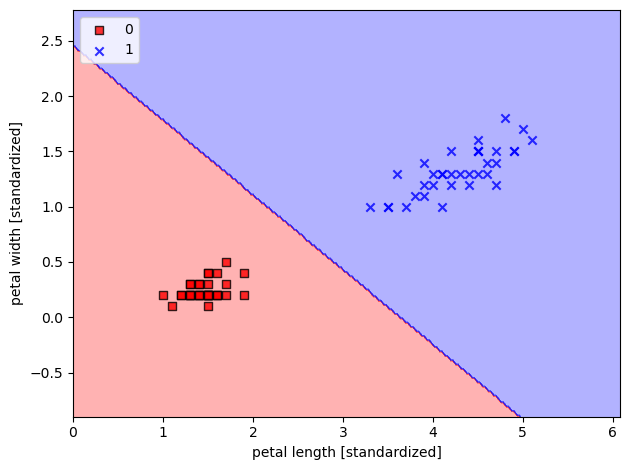

In [50]:
# 5. plot prediction result
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
def plot_decision_regions(X, y, classifier, test_idx=None, resolutions=0.02):
    """Visualize decision regions usinng matplotlib colormap
    
    Parameters
    ----------
    X: array-like vector, shape = [n_examples, n_features]
        Training vectors, also called input.
    y: array-like vector, shape = [n_examples]
        Target values.
    classifier: python object, mainly class
        binary machine learning classifier
    resolutions: float
        visualization map resolutions

    """

    # marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    colormap = ListedColormap(colors[:len(np.unique(y))])

    # decision surface
    x1_min, x1_max = X[:, 0].min() -1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() -1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolutions),
                           np.arange(x2_min, x2_max, resolutions))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=colormap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # show class examples
    for idx, col in enumerate(np.unique(y)):
        plt.scatter(x=X[y == col, 0],
                    y=X[y == col, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=col,
                    edgecolors='black')
    
    # highlight test samples
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], 
                    X_test[:, 1], 
                    c='white',
                    edgecolor='black', 
                    alpha=0.5,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')
        

plot_decision_regions(X=X_train_subset_1, y=y_train_subset_1, classifier=lrgd)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

C:\Users\12923\AppData\Local\Temp\ipykernel_40508\500669962.py:38: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == col, 0],


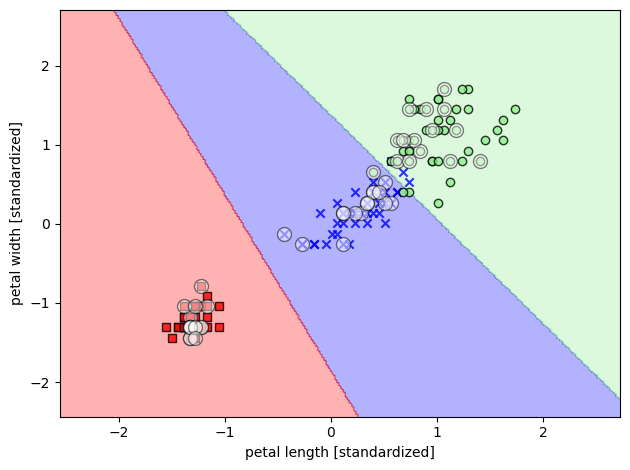

In [51]:
# 6. Logistic Regression with sklearn API

# combine the training data and testing data together 
# after we finish training model and use all data for visualization. 
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C=1000.0, random_state=1, solver='lbfgs', multi_class='ovr')
LR.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=LR, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.tight_layout()
plt.show()

In [52]:
# 7. predict function

# predict former 3 samples, and the number show probability 
# of belonging to any class with the sum of a row being 1
print(LR.predict_proba(X_test_std[:3, :]), '\n')

# show classification labels with .argmax() method
print(LR.predict_proba(X_test_std[:3, :]).argmax(axis=1), '\n')

# predict more normally
print(LR.predict(X_test_std[:3, :]), '\n')

# predict single samples using reshape because
# scikit-learn expects a 2d-array
print(LR.predict(X_test_std[0, :].reshape(1, -1)))

[[2.40380030e-12 1.42935558e-01 8.57064442e-01]
 [8.35119180e-01 1.64880820e-01 2.02061631e-16]
 [8.49517113e-01 1.50482887e-01 8.37714326e-18]] 

[2 0 0] 

[2 0 0] 

[2]


In [54]:
# 8. weight coefficient
# (n_features,)           for binary classification and single-output regression
# (n_classes, n_features) for multiclass classification
# (n_targets, n_features) for multi-output regression
weights = np.array(LR.coef_)
index = np.array(['index/column', 'iris-type-1', 'iris-type-2', 'iris-type-3'])
column = np.array(['petal-length-weights', 'petal-width-weights'])
weights = np.vstack((column, weights))
weights = np.hstack((index.reshape(4, 1), weights))
print('C=1000,change C parameter above to see how weights change:')
print(weights)

C=1000,change C parameter above to see how weights change:
[['index/column' 'petal-length-weights' 'petal-width-weights']
 ['iris-type-1' '-8.056168146199946' '-6.810447635195308']
 ['iris-type-2' '2.4394051880736316' '-2.1032624471475603']
 ['iris-type-3' '13.931105969678434' '6.623938484295327']]
